# sql load example 

In [26]:
import pymysql
import pandas as pd

def login():
    mydb = pymysql.connect(
        user='root',
        passwd='dss',
        host='34.64.111.84',
        db='my_db',
        charset='utf8'
    )
    cursor = mydb.cursor(pymysql.cursors.DictCursor)
    return mydb, cursor

In [27]:
mydb, cursor = login()

In [28]:
qry1 = ("""
SELECT * FROM my_db.naver_query;
""")

In [29]:
cursor.execute(qry1)
rlt1 = cursor.fetchall()
df_1 = pd.DataFrame(rlt1)

df_1.to_csv("naver_query.csv", index=False)

3356970

# module load

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime


# data load 

In [65]:
naver_query = pd.read_csv("naver_query.csv")
my_db = pd.read_csv("my_db.csv")

# kaida first

In [279]:
kaida = pd.read_csv("kaida.csv")

In [280]:
kaida["date"] = (kaida["year"].map(str) + "-" + kaida["month"].str.replace("월", ""))
kaida["date"] = pd.to_datetime(kaida["date"])

kaida.drop(["month", "year"], axis=1, inplace=True)

# 16-01 ~ 21-04 
kaida = kaida[kaida["date"].between("2016-01-01 ","2021-04-01")]

# I need int type in value 
kaida["value"] = kaida["value"].str.replace(",","")
kaida["value"] = kaida["value"] .astype(int)

In [281]:
# data cleaning end!
kaida.head()

,brand,model,value,sales_type,age,date
0,BMW,218dGranCoupe,0,개인-남자,~19,2021-01-01
1,BMW,520,1,개인-남자,~19,2021-01-01
2,Bentley,ContinentalGTV8,0,개인-남자,~19,2021-01-01
3,Honda,CR-VHybrid,0,개인-남자,~19,2021-01-01
4,Mercedes-Benz,E250,1,개인-남자,~19,2021-01-01


In [282]:
# For toyota
toyota_kaida = kaida[kaida["brand"] == "Toyota"]

In [283]:
toyota_kaida[toyota_kaida["date"] == "2021-04-01"].max()

brand                      Toyota
model                SiennaHybrid
value                          33
sales_type                  개인-여자
age                           70~
date          2021-04-01 00:00:00
dtype: object

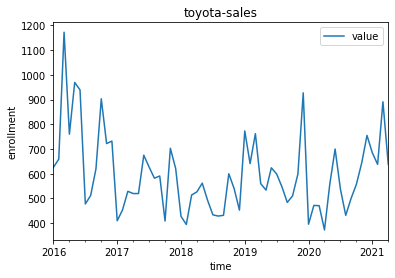

In [284]:
# toyota sales plot
toyota_kaida.groupby("date").sum().plot(title="toyota-sales" , xlabel="time" , ylabel="enrollment",\
                                        xlim =("2016-01-01 ","2021-04-01"))
plt.show()

In [229]:
#  2019년 7월 반일?!

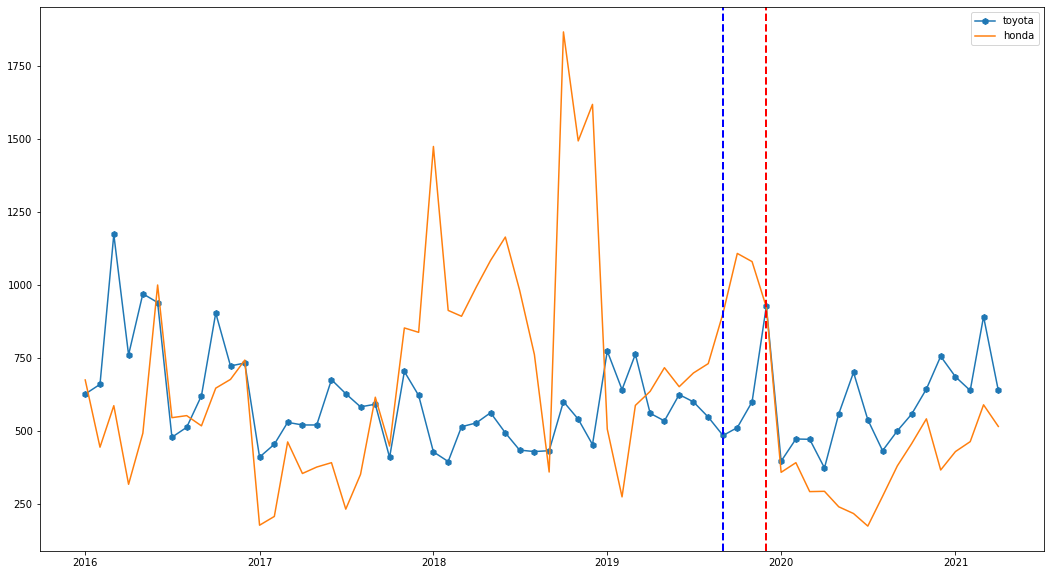

In [318]:
honda_kaida = kaida[kaida["brand"] == "Honda"]

toyota = toyota_kaida.groupby("date").sum()
honda = honda_kaida.groupby("date").sum()

plt.figure(figsize=(18,10))
plt.plot(toyota.index, toyota["value"], label="toyota", marker='h')
plt.plot(honda.index, honda["value"], label="honda",)
plt.axvline(x=datetime(2019, 9, 1), color='b', linestyle='--', linewidth=2)
plt.axvline(x=datetime(2019, 12, 1), color='r', linestyle='--', linewidth=2)

plt.legend()
plt.show()

# 반일감정이 있어도 증가 ?
http://auto.danawa.com/news/?Tab=A&Work=detail&no=3953349

# ‘보이콧 재팬’ 영향... 지난 해 일본차 판매 19% 감소
# 수입차 판매 하락… ‘벤츠’만 역대 최고 실적
https://www.hankookilbo.com/News/Read/202001061185366881

# 불매운동에 판매 반토막난 일본車, 한국서 못 보던 차 투입해 재기 모색
### 한국에서 수익성 악화로 닛산과 인피니티는 남아있던 재고만 처분한 뒤 한국에서 완전히 철수했다.
https://biz.chosun.com/site/data/html_dir/2021/01/29/2021012902201.html

In [322]:
# 2020 년 이후 움직임이 재밌네!?
# 혼다를 실질적으로 어떻게 꺽었을까?!
# 해당 년도 차종을 한번 보자?

# 점유율을 뺏겼을때의 사후 분석도 가능하다면 해보자 